# Data Visualization & Preprocessing

In [2]:
import numpy as np

## Loading Data

In [3]:
X = [] # Features per class
y = [] # Labels
N = 5250 # Amount of data we want to use max: 5250

# Import the features
with open("traindata.txt", "r") as file:
    for line in file.readlines()[:N]:
        features = [float(i) for i in line.split(",")]
        X.append(features)

# Import the labels
with open("trainlabels.txt", "r") as file:
    for line in file.readlines()[:N]:
        label = float(line.rstrip())
        y.append(label)
    
# Convert data to numpy arrays
X = np.array(X)
y = np.array(y, dtype=np.int32)

## Data Preprocessing

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
def rotate_image(image, orientation):
    angle = 90 * orientation
    
    if angle == 0:
        return image
    elif angle == 90:
        return np.fliplr(np.transpose(image))  # Rotate 90 degrees clockwise
    elif angle == 180:
        return np.flipud(np.fliplr(image))  # Rotate 180 degrees
    elif angle == 270:
        return np.transpose(np.fliplr(image))  # Rotate 270 degrees clockwise

In [6]:
image_number = 6
x = X[image_number, :-1]
orientation = X[image_number, -1] # 4 orientations: 0, 1, 2, 3
label = y[image_number]
print(orientation, label)

print(x[0])

filtered_x = x[x >= 0] # Filter out negative values
image = filtered_x.reshape([32, 32]) # reshape to an image

capped_image = np.minimum(image, 255.0) # cap values greater than 255 to 255

rotated_image = rotate_image(capped_image, orientation)

minmaxscaler = MinMaxScaler()
normalized_image = minmaxscaler.fit_transform(rotated_image.copy()) # Normalize Image


3.0 20
50.99913024902344


## Visualize Image

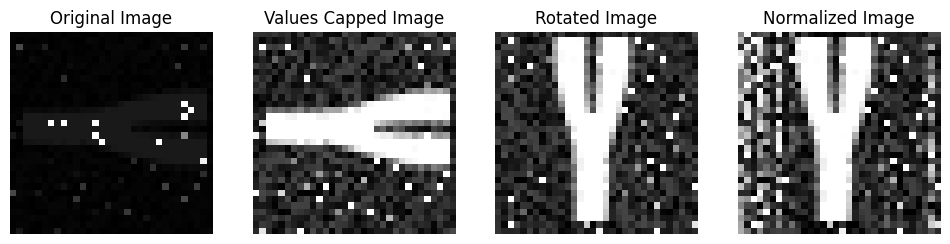

In [7]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

# Display the original image
axes[0].imshow(image, cmap="gray")
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide the axis

# Display normalized image
axes[1].imshow(capped_image, cmap="gray")
axes[1].set_title('Values Capped Image')
axes[1].axis('off')  # Hide the axis

# Display the rotated image
axes[2].imshow(rotated_image, cmap="gray")
axes[2].set_title('Rotated Image')
axes[2].axis('off')  # Hide the axis

# Display normalized image
axes[3].imshow(normalized_image, cmap="gray")
axes[3].set_title('Normalized Image')
axes[3].axis('off')  # Hide the axis

# Show the figure
plt.show()

In [8]:
def preprocess_data(X):
    x = X[:-1]
    orientation = X[-1] # 4 orientations: 0, 1, 2, 3

    filtered_x = x[x >= 0] # Filter out negative values
    filtered_x = np.minimum(filtered_x, 255.0) # cap values greater than 255 to 255
    image = filtered_x.reshape([32, 32]) # reshape to an image
    minmaxscaler = MinMaxScaler()
    normalized_image = minmaxscaler.fit_transform(image) # Normalize Image

    rotated_image = rotate_image(normalized_image, orientation)
    return rotated_image

def create_labels_data(X, y):
    labels_data = {i:[] for i in np.unique(y)}

    for index, label in enumerate(y):
        processed_X = preprocess_data(X[index])
        labels_data[label].append(processed_X)

    return labels_data

def plot_images(image, title):
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {title}")
    plt.show()


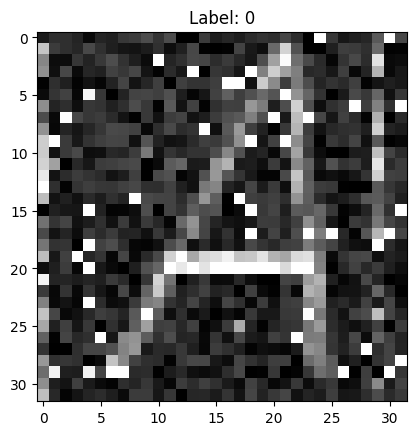

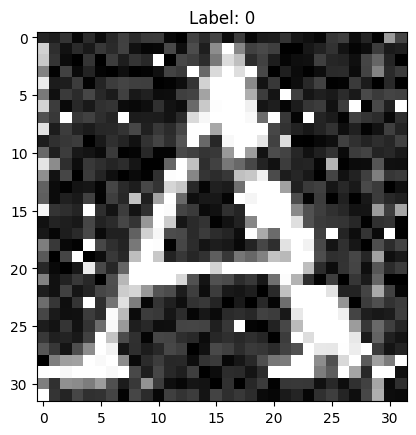

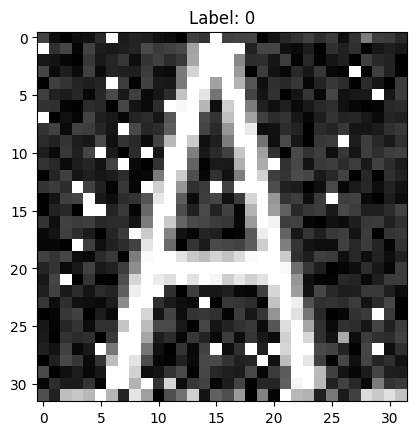

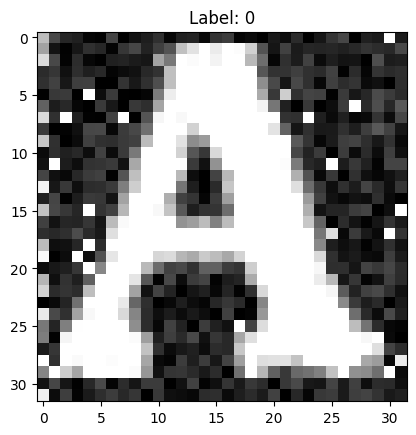

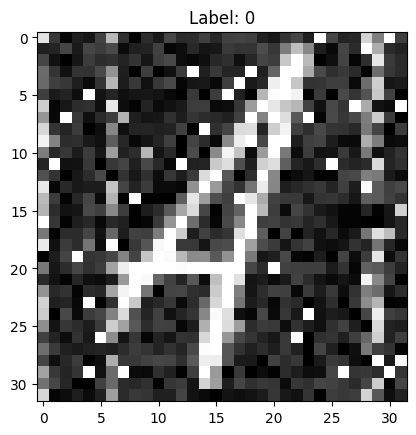

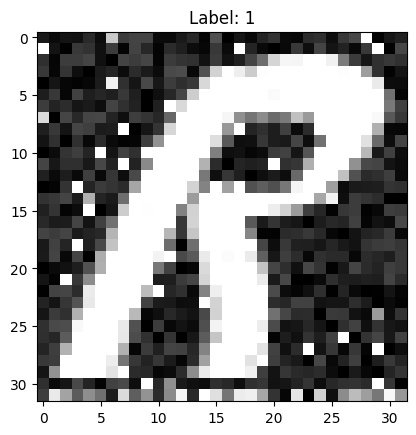

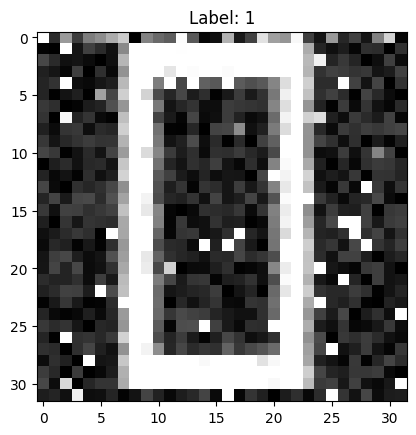

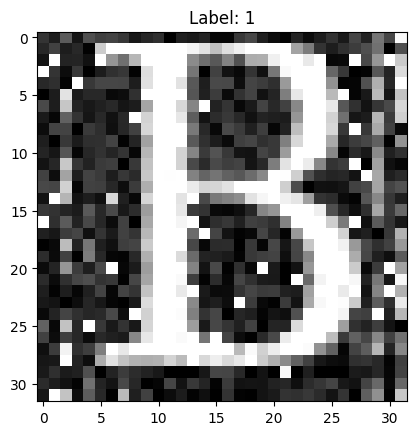

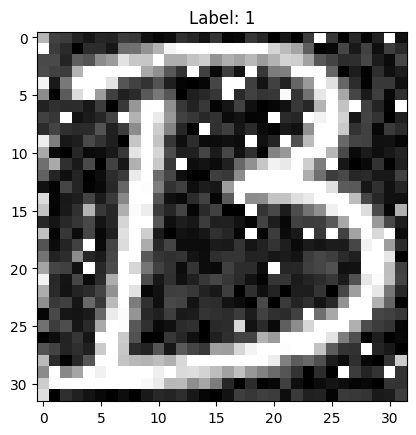

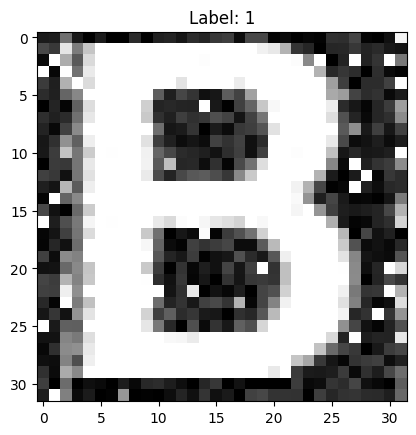

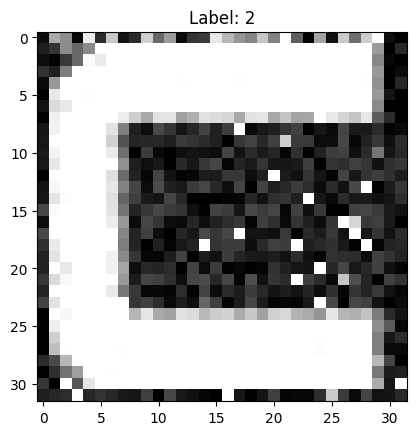

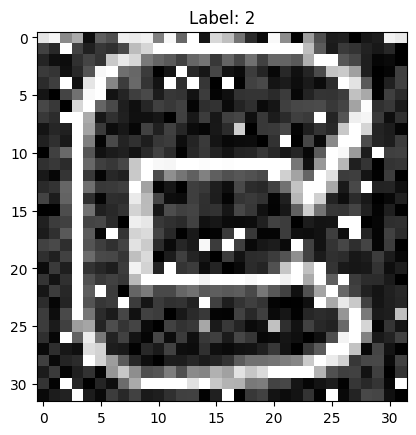

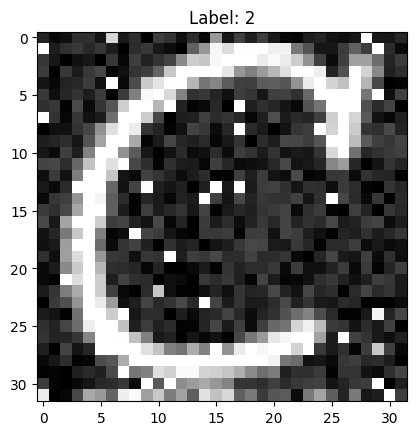

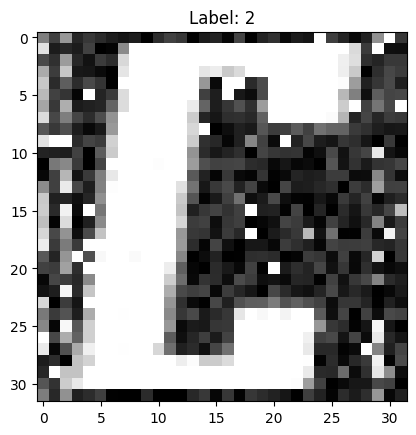

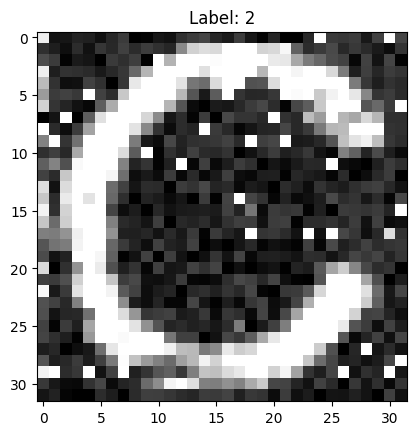

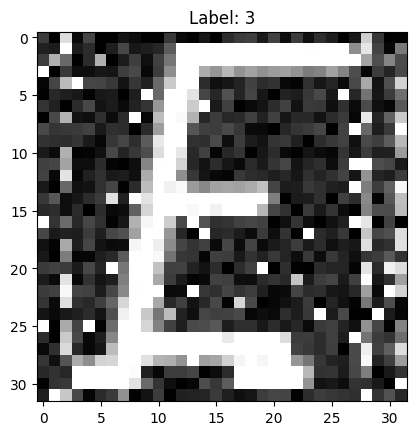

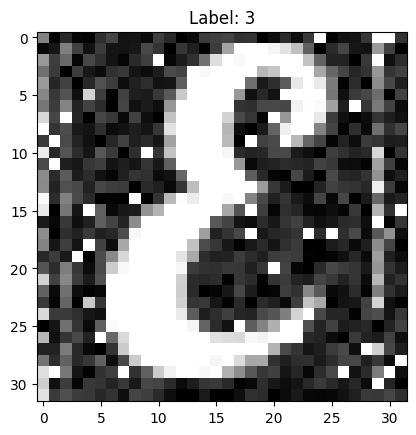

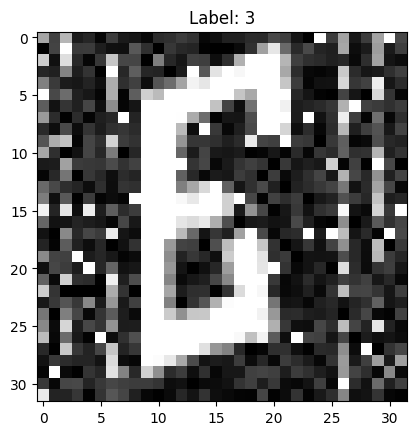

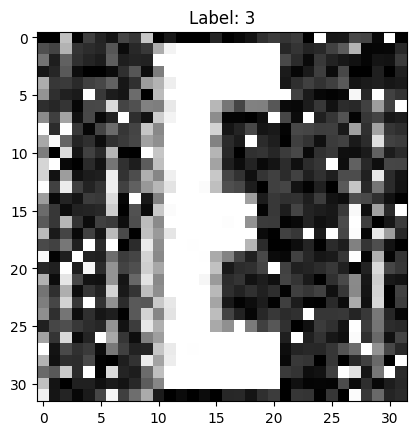

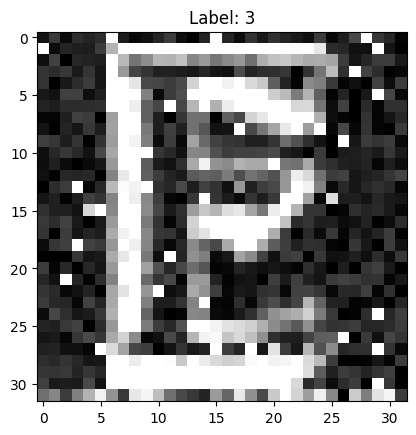

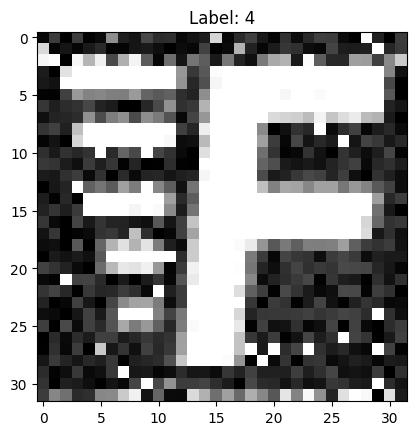

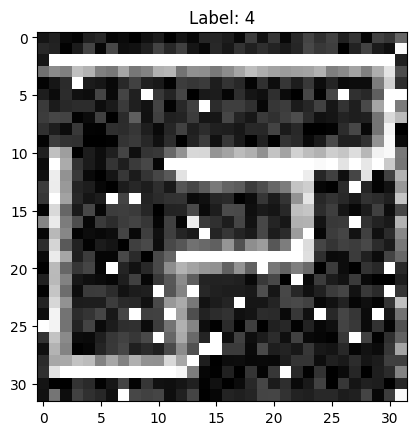

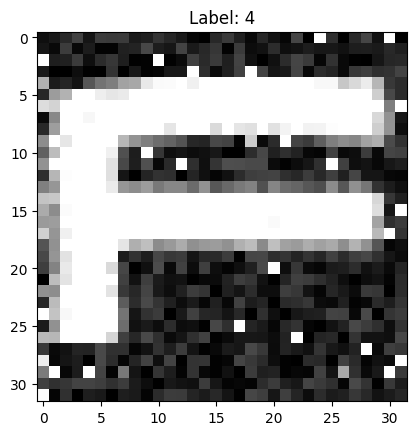

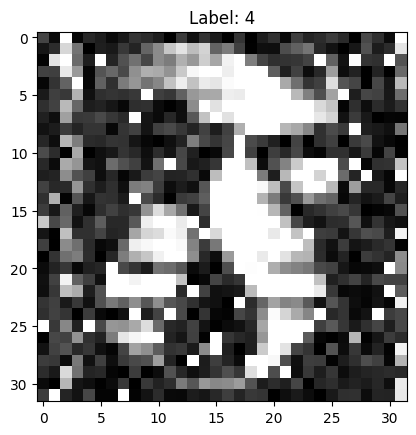

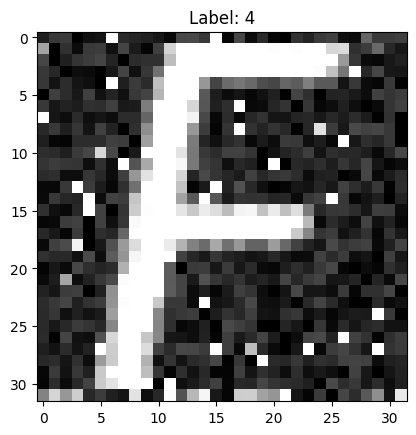

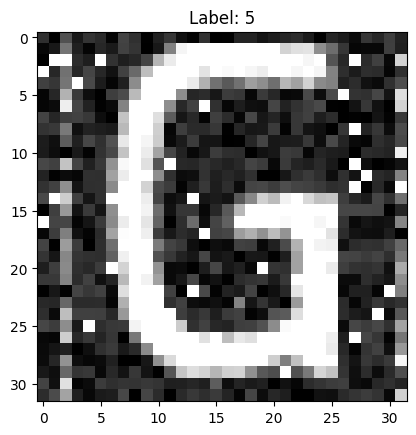

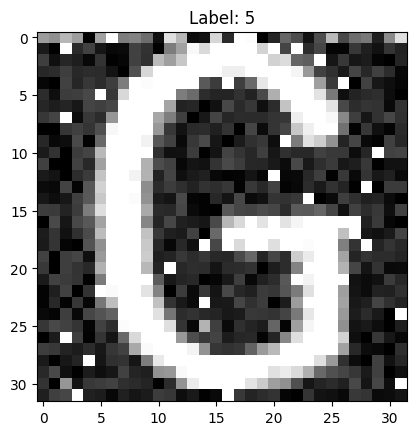

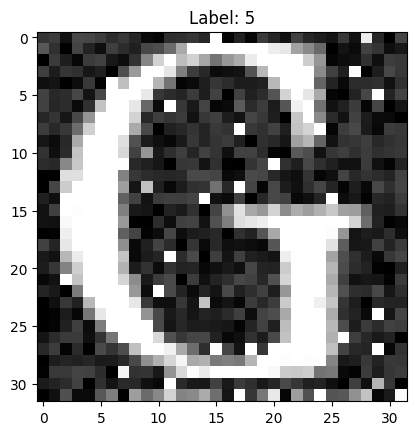

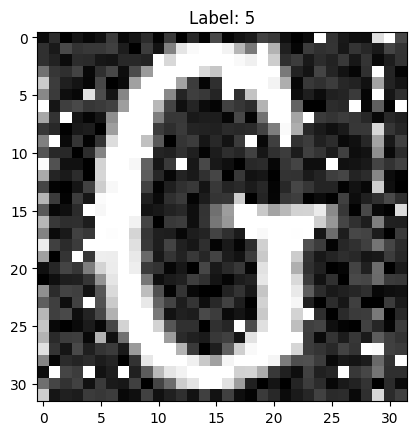

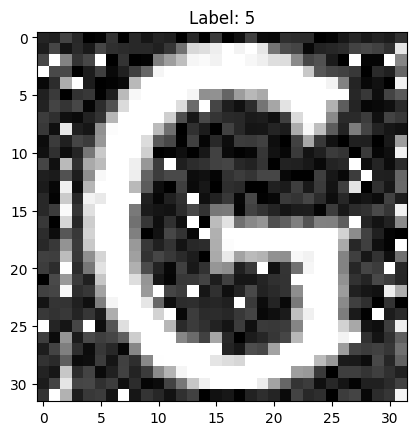

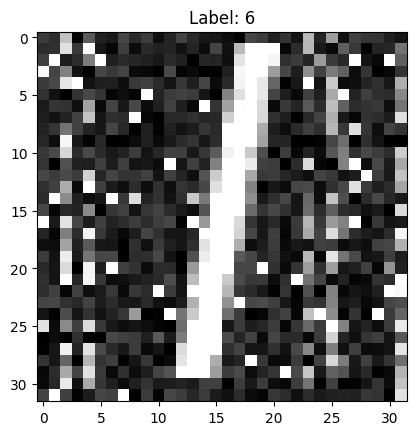

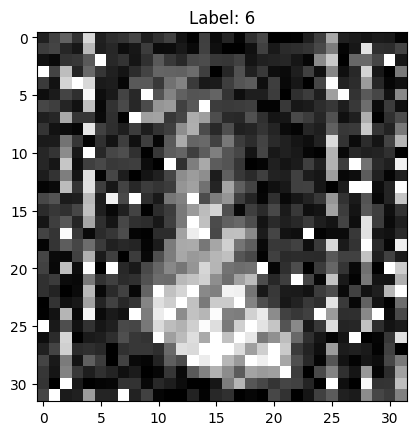

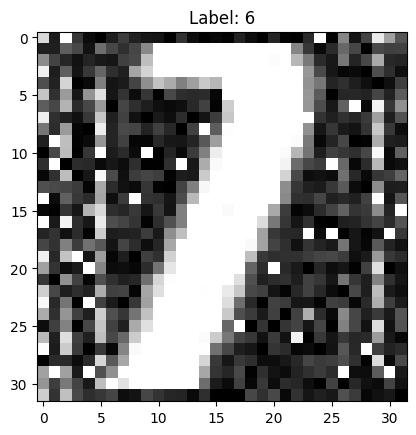

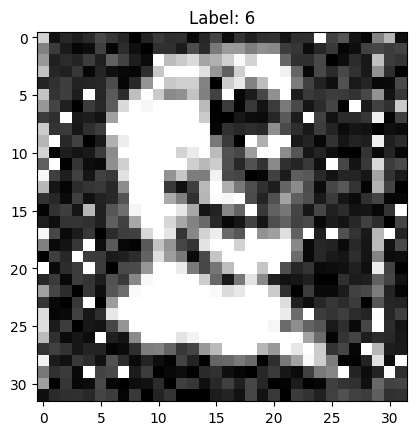

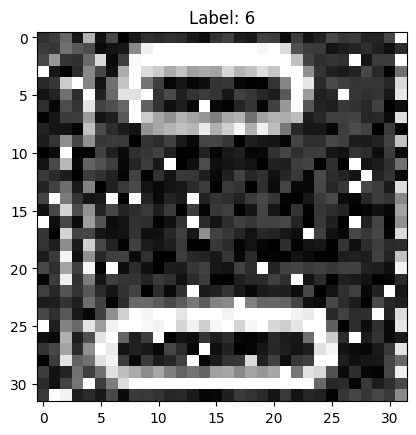

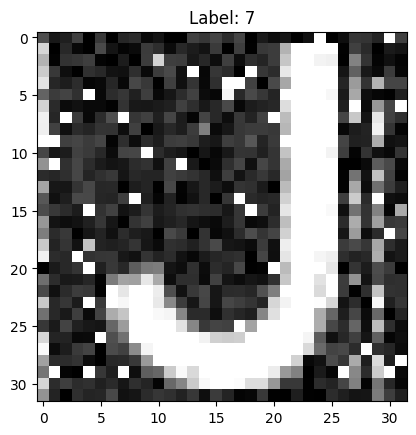

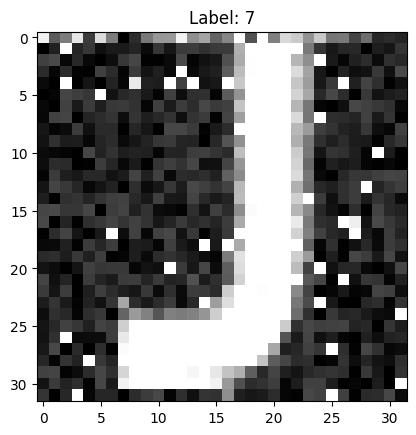

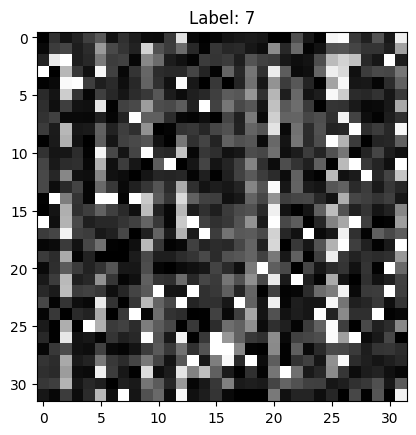

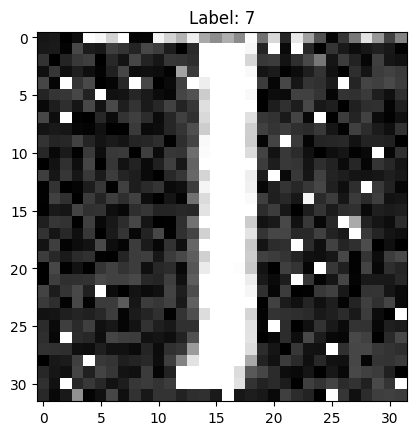

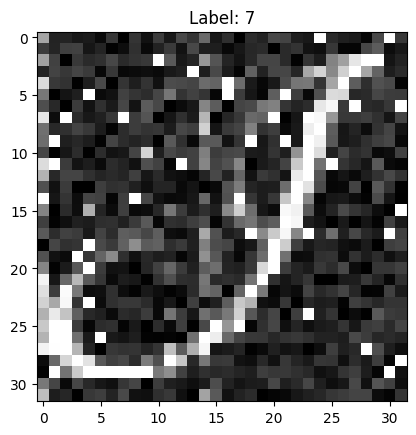

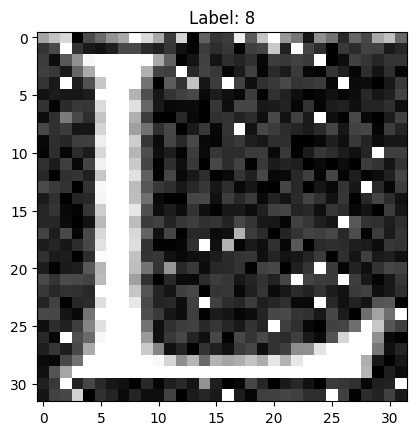

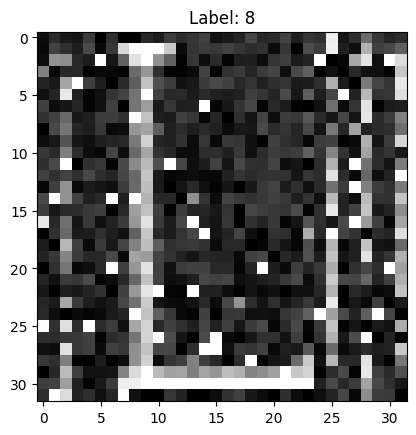

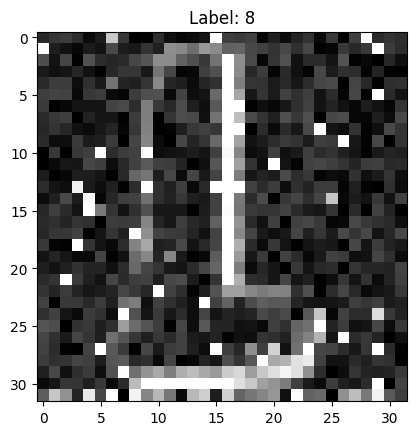

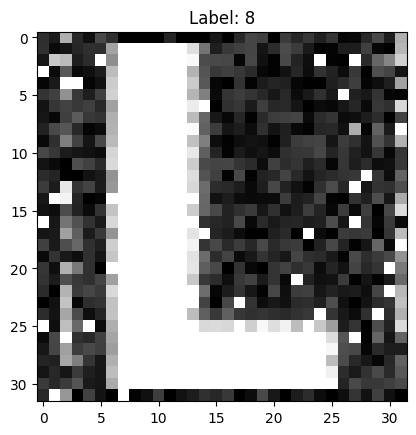

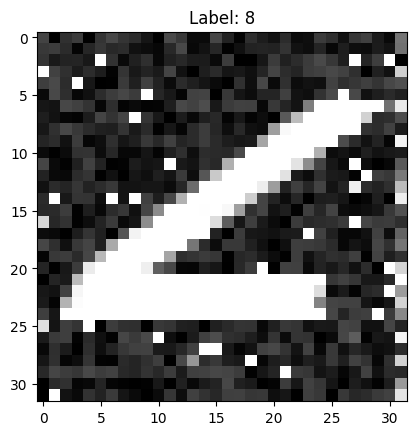

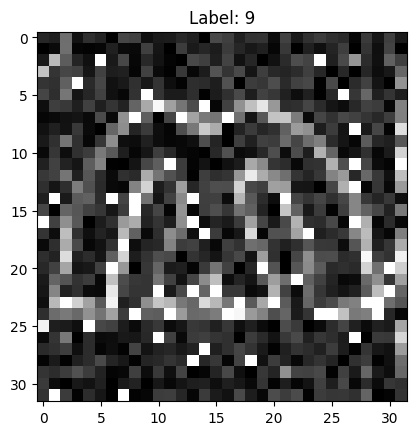

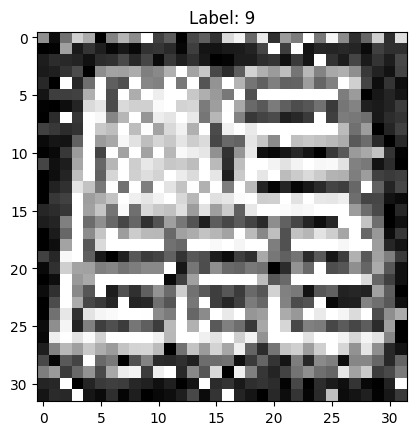

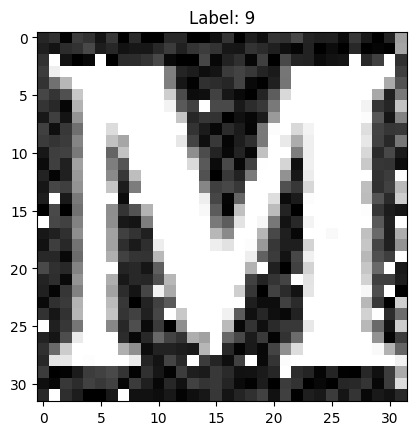

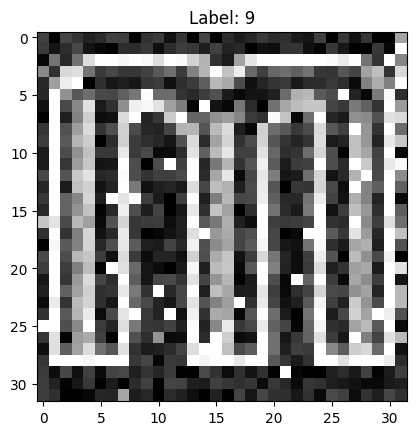

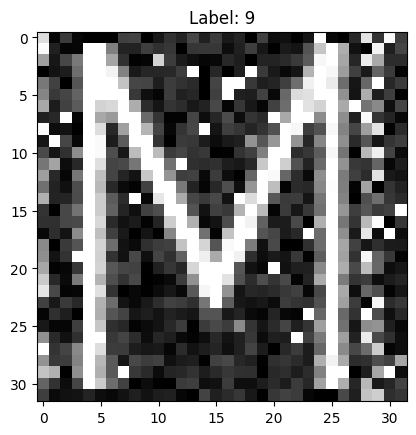

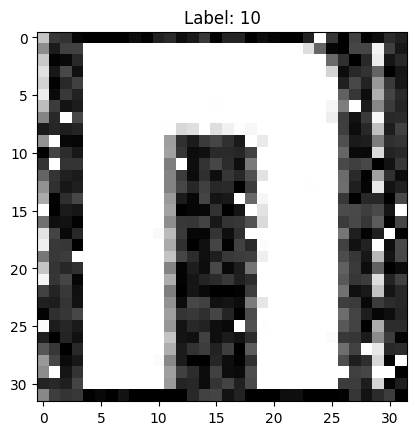

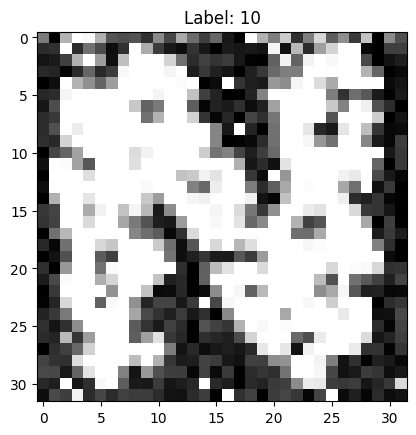

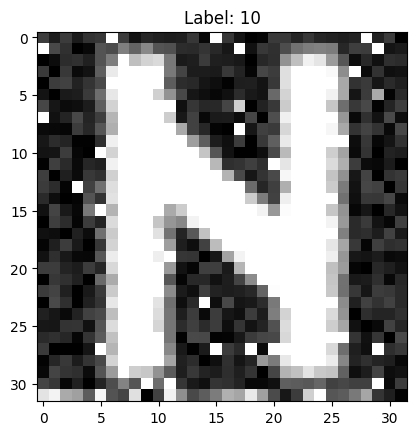

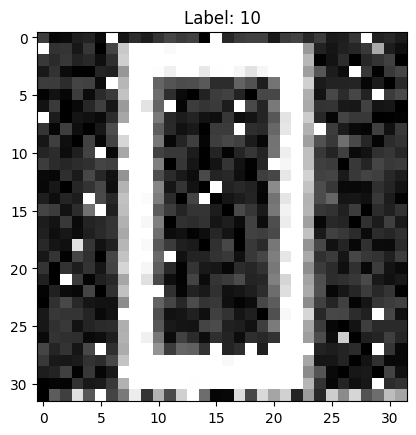

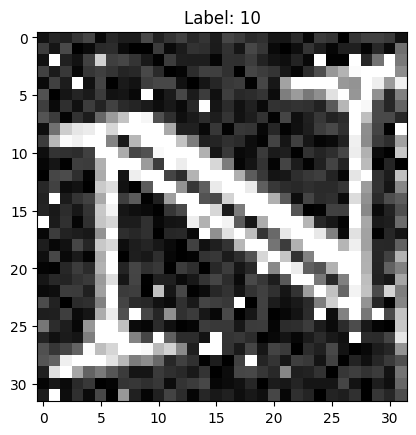

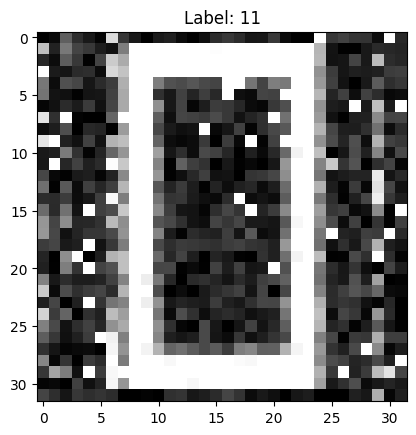

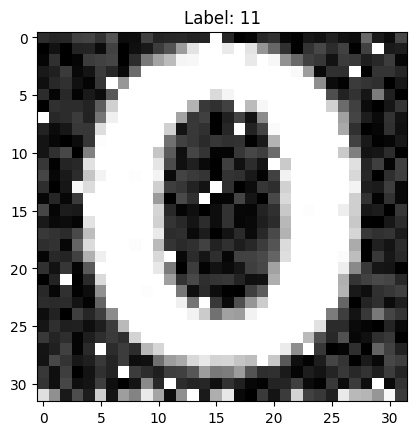

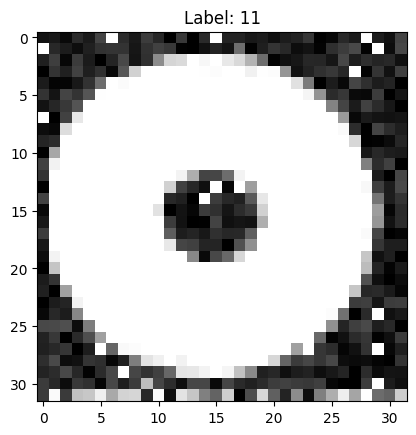

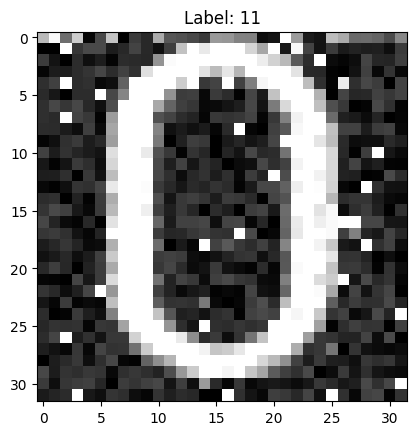

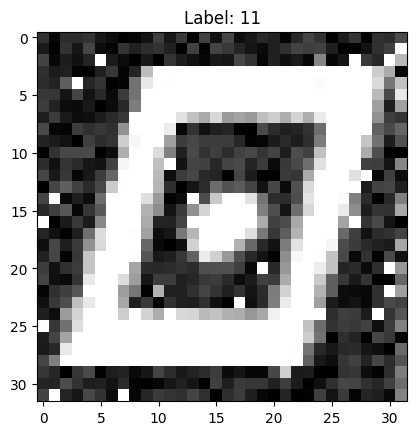

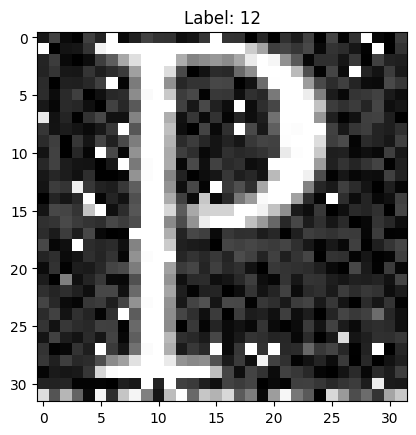

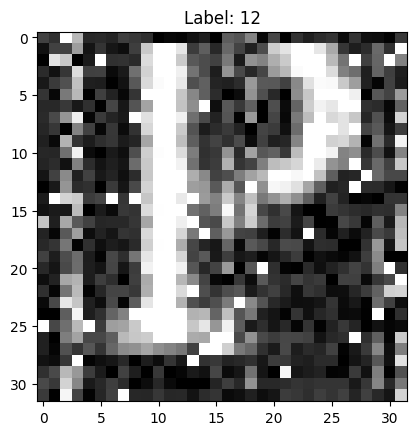

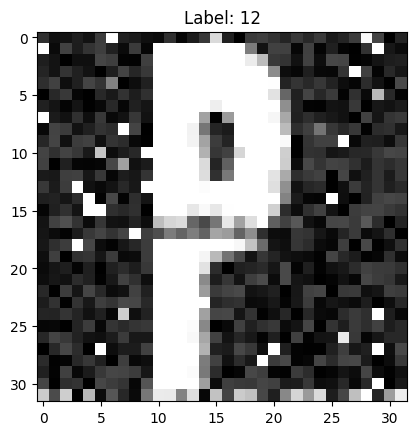

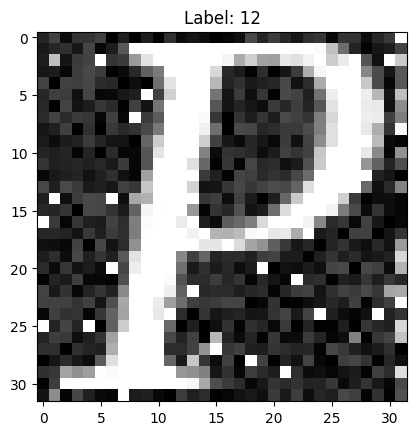

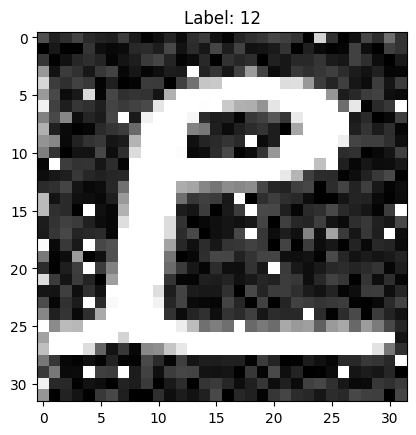

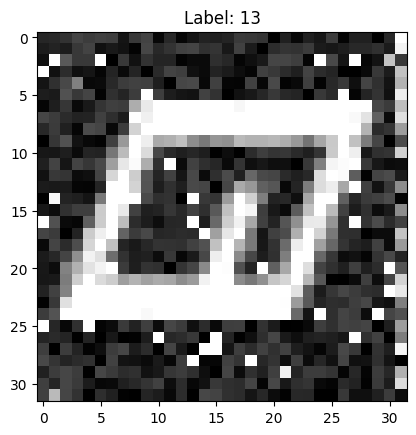

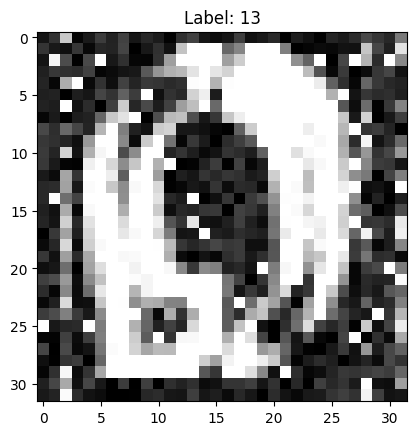

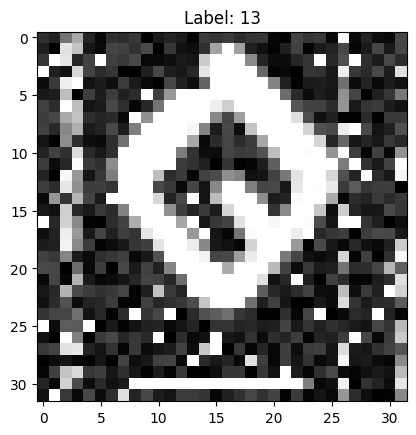

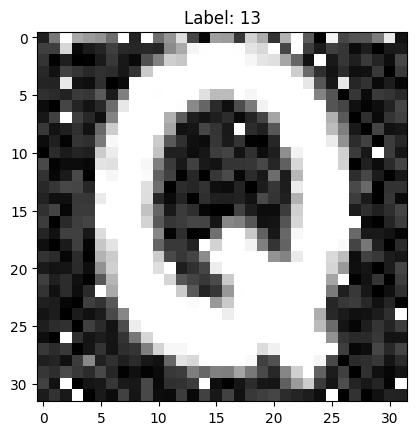

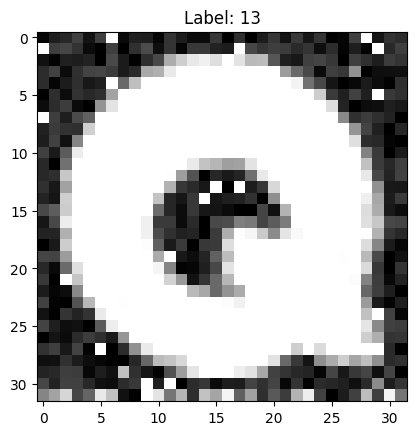

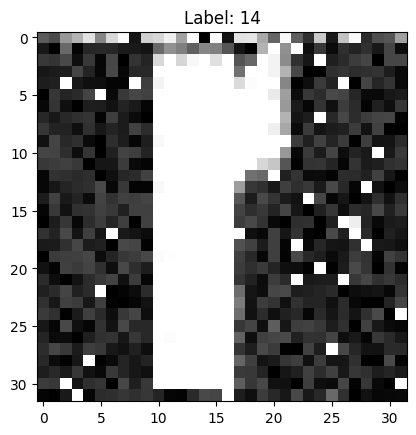

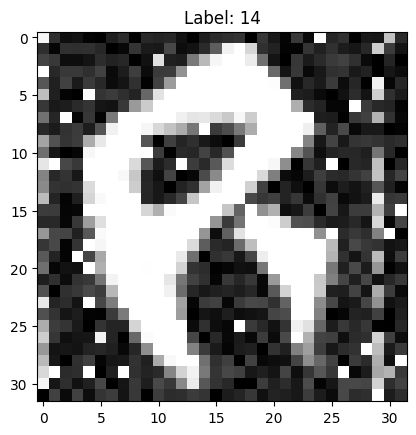

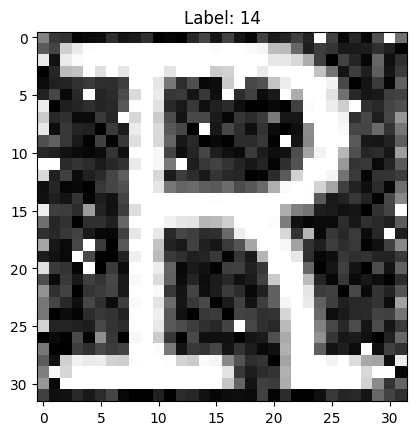

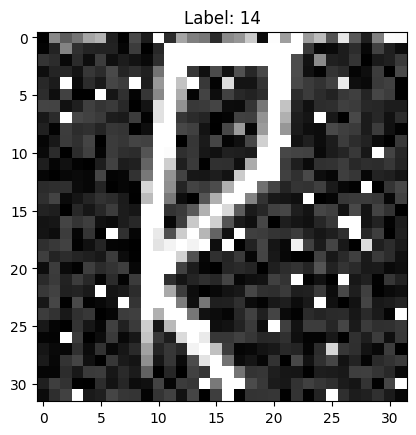

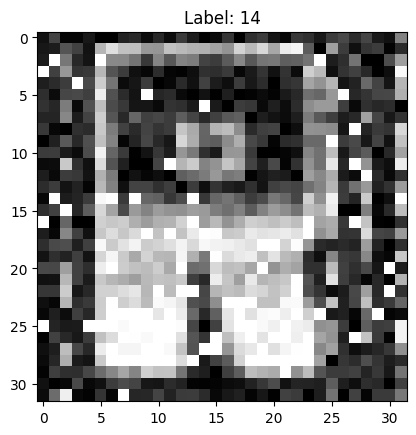

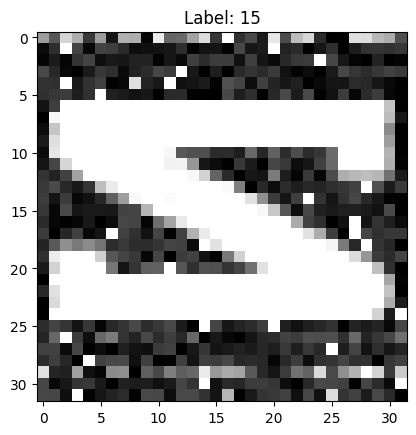

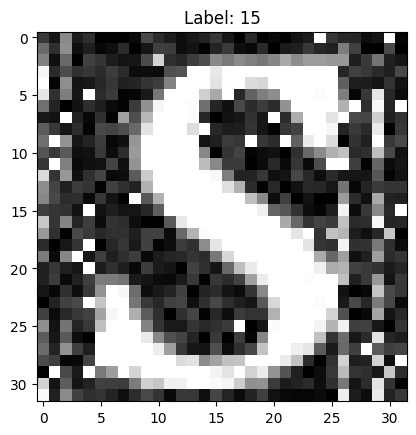

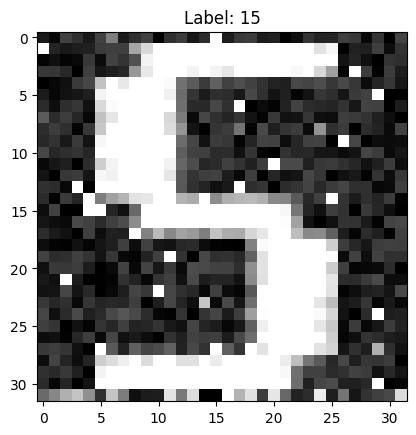

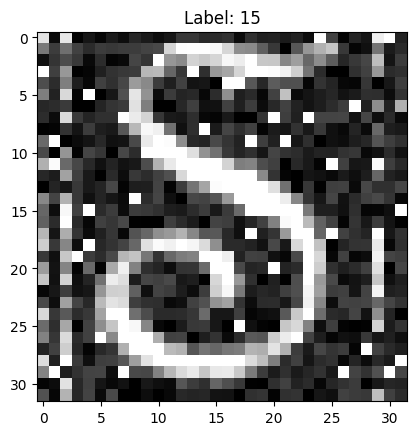

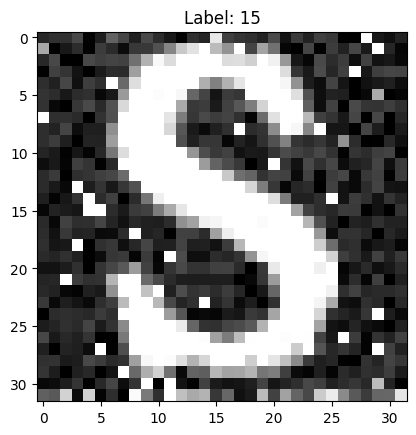

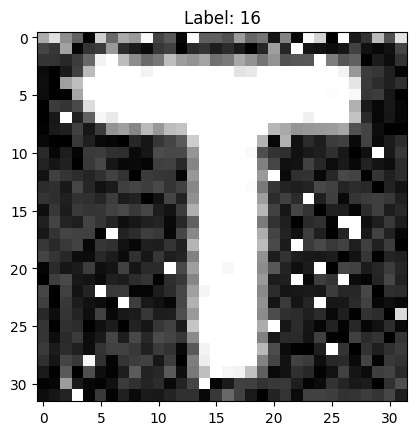

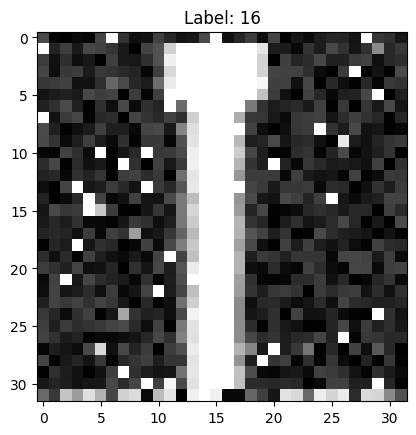

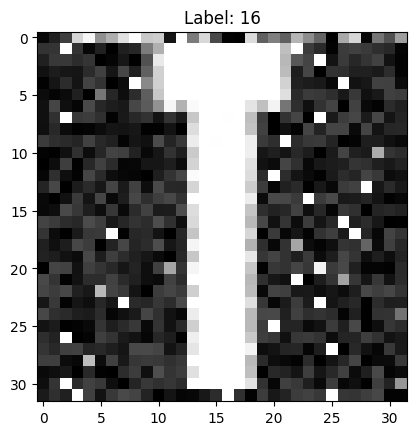

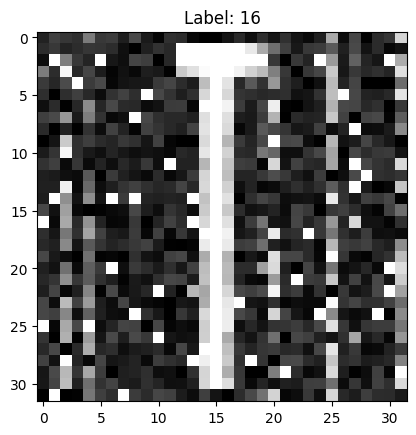

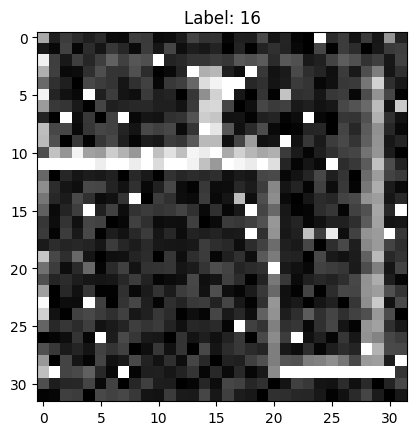

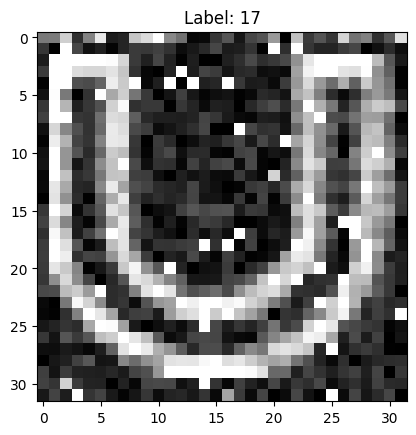

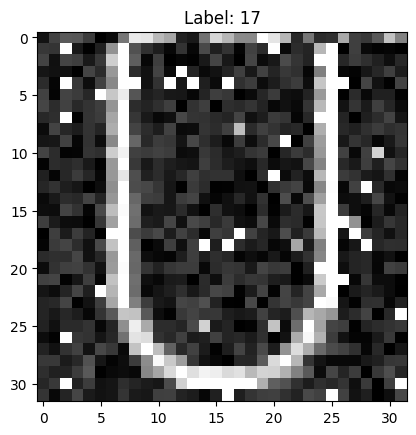

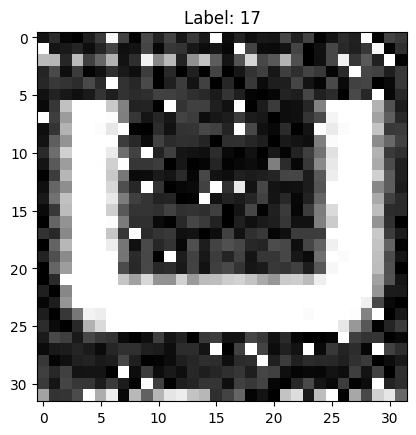

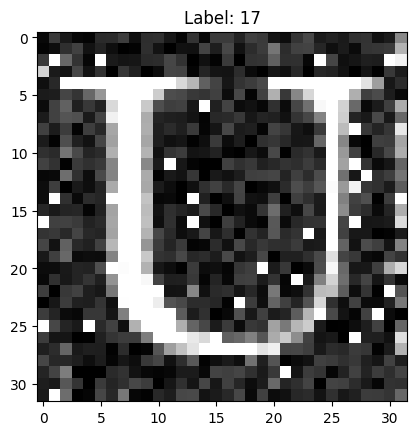

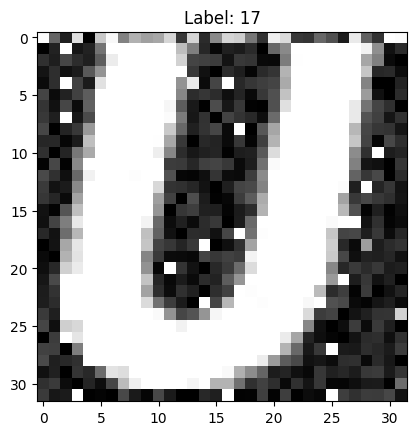

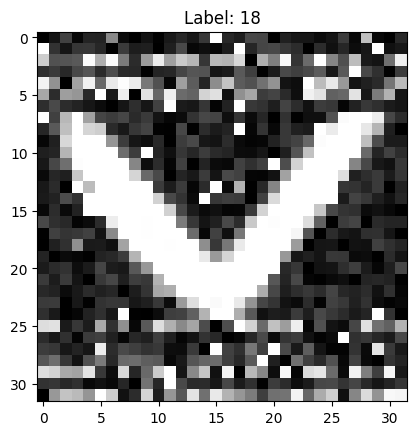

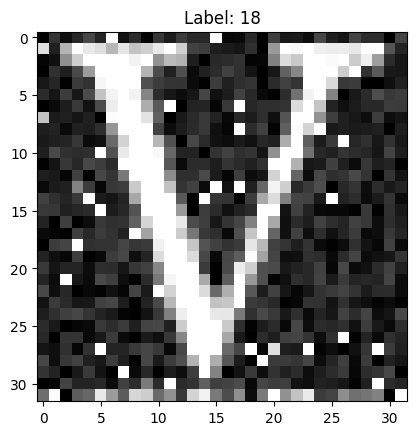

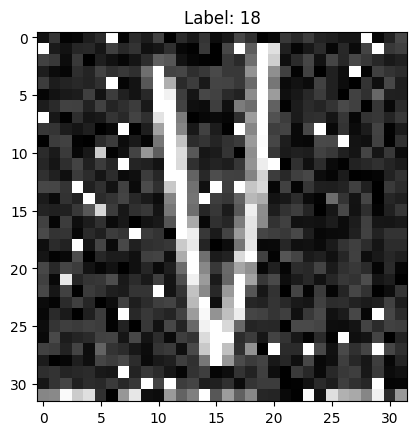

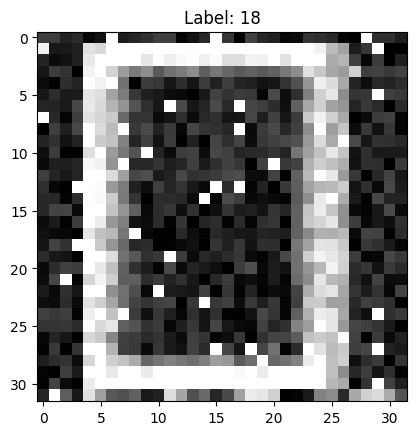

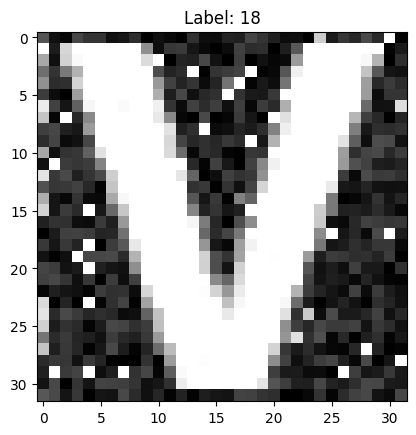

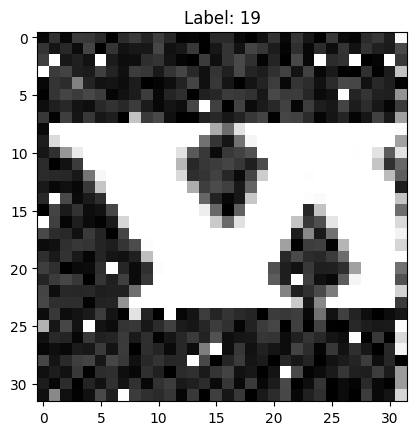

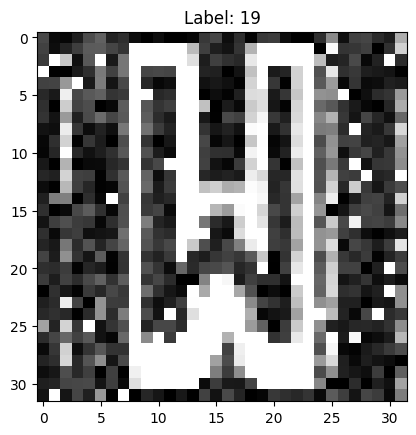

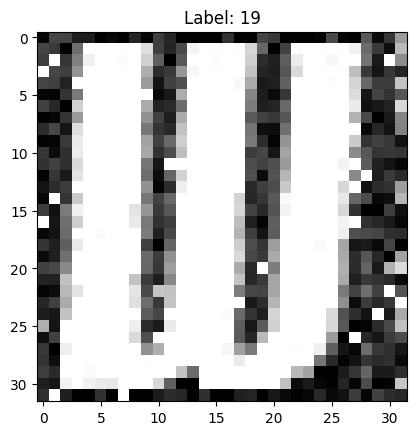

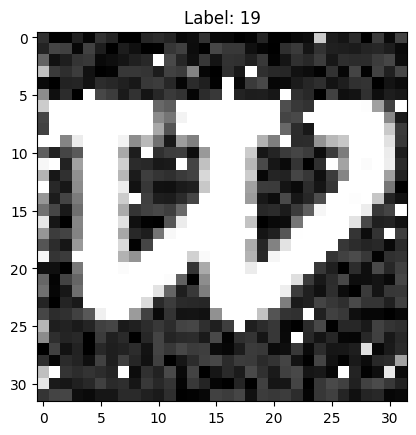

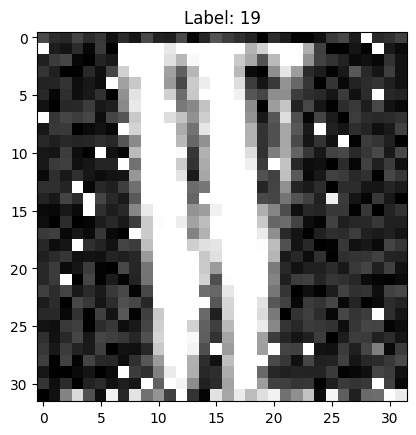

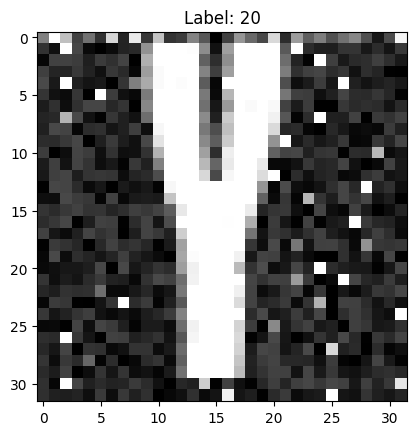

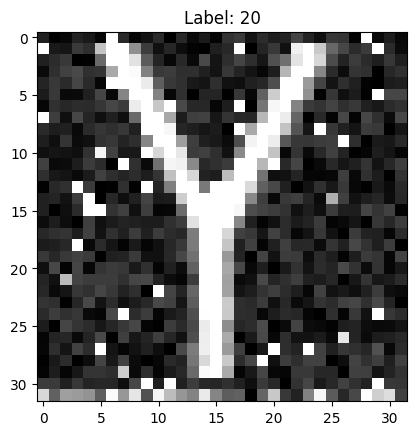

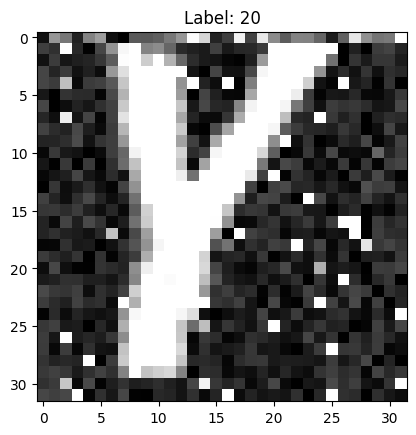

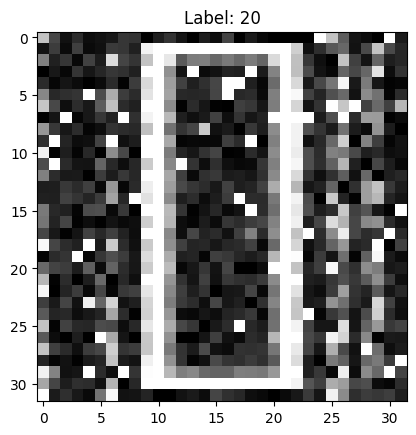

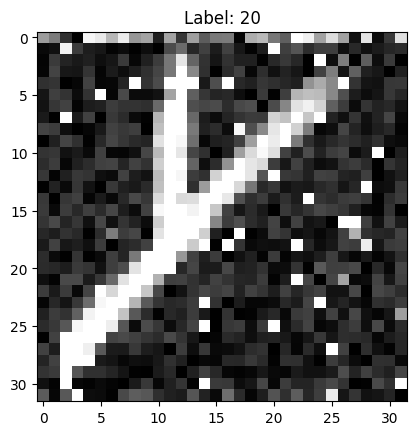

In [9]:
labels_data = create_labels_data(X, y)

for label, images in labels_data.items():
    for image in images[:5]:
        plot_images(image, label)

### Getting Additional Data

Data used is from: https://www.kaggle.com/datasets/thomasqazwsxedc/alphabet-characters-fonts-dataset

In [10]:
character_fonts = np.load("character_fonts (with handwritten data).npz")

In [11]:
images = character_fonts["images"]
labels = character_fonts["labels"]

In [19]:
def map_label(x):
    labels = [j for j in range(26) if j not in [3, 7, 10, 23, 25]]
    mapping = {labels[i] : i for i in range(21)}
    return mapping[x]


In [20]:
import cv2

In [21]:
values_to_filter = [3, 7, 10, 23, 25]
# Create a boolean mask to filter out the undesired values
mask = ~np.isin(labels, values_to_filter)

filtered_images = images[mask]
filtered_labels = labels[mask]

new_labels = np.array([map_label(label) for label in filtered_labels])
new_images = np.array([cv2.resize(image, (32, 32), interpolation=cv2.INTER_LINEAR) for image in filtered_images])

In [22]:
print(new_images.shape, new_labels.shape)

(651955, 32, 32) (651955,)


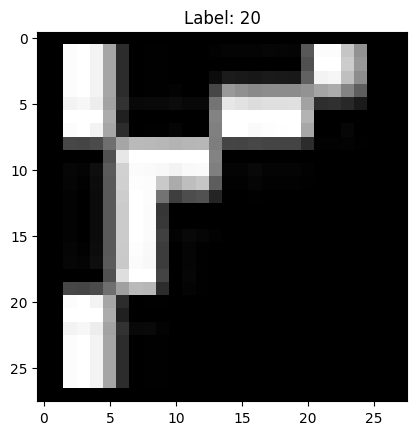

In [37]:
datapoint = 41
plot_images(filtered_images[datapoint], f"{new_labels[datapoint]}")

In [17]:
datapoints = 10_000
np.save(f"additional_data-{datapoints}", new_images[:datapoints])
np.save(f"additional_labels-{datapoints}", new_labels[:datapoints])